In [206]:
#import libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import yfinance as yf

#ticker list chosen by the group
ticker_list=['AAPL','TSLA','KO','PG','PEP','AM']

#create empty data frame
data=pd.DataFrame()

#iterate through ticker list and pull closing price into data frame. Drop unnecessary columns.
for i in ticker_list:
    
    history=yf.download(i, start='2017-12-31', end='2022-05-24')
    history=history.drop(columns=['Open', 'Adj Close','High', 'Low', 'Volume'])
    header= i
    history.rename(columns= {'Close':header}, inplace=True)
    data=pd.concat([data,history[i]],axis=1)
    data.rename(columns={0:'Date'},inplace=True)
    
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,TSLA,KO,PG,PEP,AM
2018-01-02 00:00:00,43.064999,64.106003,45.540001,90.650002,118.059998,20.709999
2018-01-03 00:00:00,43.057499,63.450001,45.439999,90.540001,117.750000,21.000000
2018-01-04 00:00:00,43.257500,62.924000,46.080002,91.180000,118.330002,20.930000
2018-01-05 00:00:00,43.750000,63.316002,46.070000,91.239998,118.669998,20.809999
2018-01-08 00:00:00,43.587502,67.281998,46.000000,91.720001,117.989998,20.600000


In [207]:
#iterate through columns in data frame and calculate short and long moving averages. Add signal and entry/exit point where position is changed.
for column in data[['AAPL','TSLA','KO','PG','PEP','AM']]:
    
# Set the short window and long windows
    short_window = 50
    long_window = 100
    
# Calculate moving averages and signals    
    data[column+'SMA50'] = data[column].rolling(window=short_window).mean()
    data[column+'SMA100'] = data[column].rolling(window=long_window).mean()
    data[column+'Signal'] = 0.0
    data[column+'Signal'][short_window:] = np.where(data[column+'SMA50'][short_window:] > data[column+'SMA100'][short_window:], 1.0, 0.0)
    data[column+'Entry/Exit'] = data[column+'Signal'].diff()

data.tail(10)

,AAPL,TSLA,KO,PG,PEP,AM,AAPLSMA50,AAPLSMA100,AAPLSignal,AAPLEntry/Exit,...,PGSignal,PGEntry/Exit,PEPSMA50,PEPSMA100,PEPSignal,PEPEntry/Exit,AMSMA50,AMSMA100,AMSignal,AMEntry/Exit
2022-05-10 00:00:00,154.509995,800.039978,64.010002,154.789993,171.490005,9.90,164.8528,167.9947,0.0,0.0,...,0.0,0.0,167.547400,169.3856,0.0,0.0,10.5622,10.2374,1.0,0.0
2022-05-11 00:00:00,146.500000,734.000000,64.309998,152.610001,170.660004,9.83,164.5188,167.7371,0.0,0.0,...,0.0,0.0,167.715200,169.3740,0.0,0.0,10.5584,10.2411,1.0,0.0
2022-05-12 00:00:00,142.559998,728.000000,64.510002,151.990005,170.399994,9.71,164.0388,167.4513,0.0,0.0,...,0.0,0.0,167.832800,169.3950,0.0,0.0,10.5518,10.2425,1.0,0.0
2022-05-13 00:00:00,147.110001,769.590027,65.720001,153.619995,173.720001,10.19,163.6564,167.2249,0.0,0.0,...,0.0,0.0,168.041800,169.4380,0.0,0.0,10.5538,10.2511,1.0,0.0
2022-05-16 00:00:00,145.539993,724.369995,65.959999,155.119995,175.470001,10.29,163.3038,166.9504,0.0,0.0,...,0.0,0.0,168.236200,169.5035,0.0,0.0,10.5554,10.2586,1.0,0.0
2022-05-17 00:00:00,149.240005,761.609985,65.779999,154.679993,174.460007,10.62,163.1026,166.6864,0.0,0.0,...,0.0,0.0,168.476400,169.5484,0.0,0.0,10.5636,10.2694,1.0,0.0
2022-05-18 00:00:00,140.820007,709.809998,61.200001,145.039993,163.649994,10.31,162.7702,166.3318,0.0,0.0,...,0.0,0.0,168.592000,169.4871,0.0,0.0,10.5658,10.2765,1.0,0.0
2022-05-19 00:00:00,137.350006,709.419983,60.000000,141.699997,161.199997,10.09,162.2582,165.9020,0.0,0.0,...,0.0,0.0,168.668000,169.3844,0.0,0.0,10.5626,10.2790,1.0,0.0
2022-05-20 00:00:00,137.589996,663.900024,60.980000,141.789993,162.210007,10.22,161.8396,165.4850,0.0,0.0,...,0.0,0.0,168.822000,169.2829,0.0,0.0,10.5590,10.2834,1.0,0.0
2022-05-23 00:00:00,143.110001,674.900024,62.860001,145.050003,165.600006,10.34,161.6072,165.1223,0.0,0.0,...,0.0,0.0,169.059401,169.2092,0.0,0.0,10.5618,10.2904,1.0,0.0


In [208]:
# Chart AAPL price, moving averages and entry/exit points

#Exit position

exit = data[data['AAPLEntry/Exit'] == -1.0]['AAPL'].hvplot.scatter(
    color='red',
    legend=False,
 
)

# Entry position  

entry = data[data['AAPLEntry/Exit'] == 1.0]['AAPL'].hvplot.scatter(
    color='blue',
    legend=False,

)

# AAPL closing price

security_close = data[['AAPL']].hvplot(
    line_color='gray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# AAPL moving averages

moving_avgs = data[['AAPLSMA50', 'AAPLSMA100']].hvplot(
    ylabel='Price in $',
    
    width=1000,
    height=400
)

# Graph all on a chart
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis= None)

:Overlay
   .Curve.I         :Curve   [index]   (AAPL)
   .NdOverlay.I     :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .Scatter.AAPL.I  :Scatter   [index]   (AAPL)
   .Scatter.AAPL.II :Scatter   [index]   (AAPL)

<AxesSubplot:>

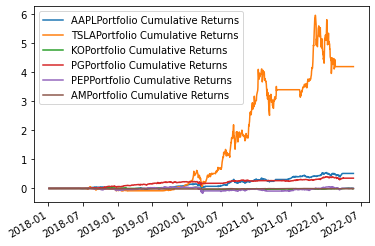

In [209]:
#Calculate returns using strategy across all tickers. I'm sure there is a better way to iterate through all of these.

# Set initial capital
aapl_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
data['AAPLPosition'] = share_size * data['AAPLSignal']

# Find the points in time where a 500 share position is bought or sold
data['AAPLEntry/Exit Position'] = data['AAPLPosition'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
data['AAPLPortfolio Holdings'] = data['AAPL'] * data['AAPLEntry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
data['AAPLPortfolio Cash'] = aapl_capital - (data['AAPL'] * data['AAPLEntry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
data['AAPLPortfolio Total'] = data['AAPLPortfolio Cash'] + data['AAPLPortfolio Holdings']

# Calculate the portfolio daily returns
data['AAPLPortfolio Daily Returns'] = data['AAPLPortfolio Total'].pct_change()

# Calculate the cumulative returns
data['AAPLPortfolio Cumulative Returns'] = (1 + data['AAPLPortfolio Daily Returns']).cumprod() - 1


# Set initial capital
tsla_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
data['TSLAPosition'] = share_size * data['TSLASignal']

# Find the points in time where a 500 share position is bought or sold
data['TSLAEntry/Exit Position'] = data['TSLAPosition'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
data['TSLAPortfolio Holdings'] = data['TSLA'] * data['TSLAEntry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
data['TSLAPortfolio Cash'] = aapl_capital - (data['TSLA'] * data['TSLAEntry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
data['TSLAPortfolio Total'] = data['TSLAPortfolio Cash'] + data['TSLAPortfolio Holdings']

# Calculate the portfolio daily returns
data['TSLAPortfolio Daily Returns'] = data['TSLAPortfolio Total'].pct_change()

# Calculate the cumulative returns
data['TSLAPortfolio Cumulative Returns'] = (1 + data['TSLAPortfolio Daily Returns']).cumprod() - 1


ko_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
data['KOPosition'] = share_size * data['KOSignal']

# Find the points in time where a 500 share position is bought or sold
data['KOEntry/Exit Position'] = data['KOPosition'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
data['KOPortfolio Holdings'] = data['KO'] * data['KOEntry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
data['KOPortfolio Cash'] = aapl_capital - (data['KO'] * data['KOEntry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
data['KOPortfolio Total'] = data['KOPortfolio Cash'] + data['KOPortfolio Holdings']

# Calculate the portfolio daily returns
data['KOPortfolio Daily Returns'] = data['KOPortfolio Total'].pct_change()

# Calculate the cumulative returns
data['KOPortfolio Cumulative Returns'] = (1 + data['KOPortfolio Daily Returns']).cumprod() - 1




pg_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
data['PGPosition'] = share_size * data['PGSignal']

# Find the points in time where a 500 share position is bought or sold
data['PGEntry/Exit Position'] = data['PGPosition'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
data['PGPortfolio Holdings'] = data['PG'] * data['PGEntry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
data['PGPortfolio Cash'] = aapl_capital - (data['PG'] * data['PGEntry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
data['PGPortfolio Total'] = data['PGPortfolio Cash'] + data['PGPortfolio Holdings']

# Calculate the portfolio daily returns
data['PGPortfolio Daily Returns'] = data['PGPortfolio Total'].pct_change()

# Calculate the cumulative returns
data['PGPortfolio Cumulative Returns'] = (1 + data['PGPortfolio Daily Returns']).cumprod() - 1




pep_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
data['PEPPosition'] = share_size * data['PEPSignal']

# Find the points in time where a 500 share position is bought or sold
data['PEPEntry/Exit Position'] = data['PEPPosition'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
data['PEPPortfolio Holdings'] = data['PEP'] * data['PEPEntry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
data['PEPPortfolio Cash'] = aapl_capital - (data['PEP'] * data['PEPEntry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
data['PEPPortfolio Total'] = data['PEPPortfolio Cash'] + data['PEPPortfolio Holdings']

# Calculate the portfolio daily returns
data['PEPPortfolio Daily Returns'] = data['PEPPortfolio Total'].pct_change()

# Calculate the cumulative returns
data['PEPPortfolio Cumulative Returns'] = (1 + data['PEPPortfolio Daily Returns']).cumprod() - 1




am_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
data['AMPosition'] = share_size * data['AMSignal']

# Find the points in time where a 500 share position is bought or sold
data['AMEntry/Exit Position'] = data['AMPosition'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
data['AMPortfolio Holdings'] = data['AM'] * data['AMEntry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
data['AMPortfolio Cash'] = aapl_capital - (data['AM'] * data['AMEntry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
data['AMPortfolio Total'] = data['AMPortfolio Cash'] + data['AMPortfolio Holdings']

# Calculate the portfolio daily returns
data['AMPortfolio Daily Returns'] = data['AMPortfolio Total'].pct_change()

# Calculate the cumulative returns
data['AMPortfolio Cumulative Returns'] = (1 + data['AMPortfolio Daily Returns']).cumprod() - 1



#Create new data frame with cumulative returns for all tickers

cumulative_returns_df= pd.DataFrame()
cumulative_returns_df=pd.concat([data['AAPLPortfolio Cumulative Returns'],
                    data['TSLAPortfolio Cumulative Returns'],
                    data['KOPortfolio Cumulative Returns'],
                    data['PGPortfolio Cumulative Returns'],
                    data['PEPPortfolio Cumulative Returns'],
                    data['AMPortfolio Cumulative Returns']],axis=1)



# Print the DataFrame
cumulative_returns_df.plot()



<AxesSubplot:>

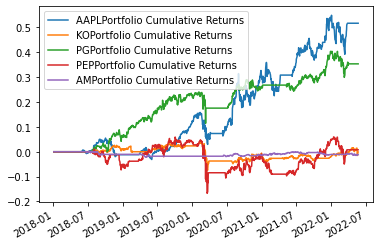

In [210]:
#Create new data frame with cumulative returns excluding TSLA for better visualization

cumulative_returns_ex_tsla = cumulative_returns_df.drop(columns=['TSLAPortfolio Cumulative Returns'])

cumulative_returns_ex_tsla.plot()


In [211]:
#Graph AAPL total portfolio value with buy/sell signals

# Visualize exit position relative to total portfolio value
exit = data[data['AAPLEntry/Exit'] == -1.0]['AAPLPortfolio Total'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = data[data['AAPLEntry/Exit'] == 1.0]['AAPLPortfolio Total'].hvplot.scatter(
    color='blue',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize total portoflio value for the investment
total_portfolio_value = data[['AAPLPortfolio Total']].hvplot(
    line_color='gray',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Overlay plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I                        :Curve   [index]   (AAPLPortfolio Total)
   .Scatter.AAPLPortfolio_Total.I  :Scatter   [index]   (AAPLPortfolio Total)
   .Scatter.AAPLPortfolio_Total.II :Scatter   [index]   (AAPLPortfolio Total)

In [212]:
#Try a machine learning model for the same data set. Generate daily trading signals using moving averages as model features.

#import libraries from sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

#create function to pull yfinance data into separate dataframes for each ticker

def SeparateDFs(data_df,ticker):
    Stock_df=pd.DataFrame()
    Stock_df=yf.download(ticker, start='2017-12-31', end='2022-05-24')
    Stock_df= Stock_df.drop(columns=['Adj Close','High', 'Low', 'Volume'])
    data_df[ticker]= Stock_df
    
#create empty dictionary and make the keys each stock ticker
    
ticker_list=['AAPL','TSLA','KO','PG','PEP','AM'] 
Stock_Data = {}

for i in ticker_list:
    SeparateDFs(Stock_Data, i)
    
#shift data one period and calculate daily returns. Use log returns to help normalize data. Calculate short and long moving averages to use as model features. Add to dictionary.

    Stock_Data[i]['Close Shifted'] = Stock_Data[i]['Close'].shift(1)
      
    Stock_Data[i]['Returns'] = np.log(Stock_Data[i]['Open']/Stock_Data[i]['Open'].shift(1)) 
   
    short_window = 50
    long_window = 100
    Stock_Data[i]['SMA50'] = Stock_Data[i]['Close Shifted'].rolling(window=short_window).mean()
    Stock_Data[i]['SMA100'] = Stock_Data[i]['Close Shifted'].rolling(window=long_window).mean()

#create signal column. Model will estimate one day return - binary up or down 1,0.    
    Signal_List = []
    for j in Stock_Data[i]['Returns']:
        
        if (j>=0):
            Signal_List.append("1")
            
        else:
            Signal_List.append("0")
            
    Stock_Data[i]['Signal'] = Signal_List

#display dictionary    
display(Stock_Data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'AAPL':                   Open       Close  Close Shifted   Returns     SMA50  \
 Date                                                                    
 2018-01-02   42.540001   43.064999            NaN       NaN       NaN   
 2018-01-03   43.132500   43.057499      43.064999  0.013832       NaN   
 2018-01-04   43.134998   43.257500      43.057499  0.000058       NaN   
 2018-01-05   43.360001   43.750000      43.257500  0.005203       NaN   
 2018-01-08   43.587502   43.587502      43.750000  0.005233       NaN   
 ...                ...         ...            ...       ...       ...   
 2022-05-17  148.860001  149.240005     145.539993  0.022487  163.3038   
 2022-05-18  146.850006  140.820007     149.240005 -0.013595  163.1026   
 2022-05-19  139.880005  137.350006     140.820007 -0.048627  162.7702   
 2022-05-20  139.089996  137.589996     137.350006 -0.005664  162.2582   
 2022-05-23  137.789993  143.110001     137.589996 -0.009390  161.8396   
 
               SMA100 Signal

In [213]:
#scale data using max absolute value of log returns
max_abs_scaler = preprocessing.MaxAbsScaler()

#create new dictionary for SVM model
Model_Dict = {}

#iterate through ticker list and transform data. Data needs to be in numpy array for machine learning model
for i in ticker_list:
    Stock_Data[i].dropna(inplace=True)
    
    X = np.array(Stock_Data[i].drop(['Signal','Returns'],1))
    X = max_abs_scaler.fit_transform(X)
    Y = np.array(Stock_Data[i]['Signal'])

# 70/30 train/test split for the data

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    
    Model_Dict[i] = {}
    Model_Dict[i]['X Train'] = X_train
    Model_Dict[i]['X Test'] = X_test
    Model_Dict[i]['Y Train'] = y_train
    Model_Dict[i]['Y Test'] = y_test
    
 #defaul rbf kernel and one versus one "ovo" decision function shape. Add y prediciton column to dictionary  
    model = svm.SVC(kernel='rbf',decision_function_shape='ovo')    
    model.fit(Model_Dict[i]['X Train'], Model_Dict[i]['Y Train'])
    y_pred = model.predict(Model_Dict[i]['X Test'])    
    Model_Dict[i]['Y Prediction'] = y_pred
    
# calculate accuracy, precision and recall metrics and add to dictionary   
  
    Model_Dict[i]['Accuracy'] = metrics.accuracy_score(Model_Dict[i]['Y Test'], Model_Dict[i]['Y Prediction'])
    Model_Dict[i]['Precision'] = metrics.precision_score(Model_Dict[i]['Y Test'], Model_Dict[i]['Y Prediction'],pos_label=str(1),average="macro")
    Model_Dict[i]['Recall'] = metrics.recall_score(Model_Dict[i]['Y Test'], Model_Dict[i]['Y Prediction'],pos_label=str(1),average="macro")
   

C:\Users\james\AppData\Local\Temp\ipykernel_16524\3262802984.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(Stock_Data[i].drop(['Signal','Returns'],1))
C:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'ma

In [252]:
#iterate through ticker list
for i in ticker_list:

#determine prediction period    
    prediction_length = len(Model_Dict[i]['Y Prediction'])

#create new columns in stock dicitonary    
    Stock_Data[i]['SVM Signal'] = 0
    Stock_Data[i]['SVM Returns'] = 0
    Stock_Data[i]['Total Strat Returns'] = 0
    Stock_Data[i]['Market Returns'] = 0

#create variables to make it easier to reference    
    Signal_Column = Stock_Data[i].columns.get_loc('SVM Signal')
    Strat_Column = Stock_Data[i].columns.get_loc('SVM Returns')
    Return_Column = Stock_Data[i].columns.get_loc('Total Strat Returns')
    Market_Column = Stock_Data[i].columns.get_loc('Market Returns')
    
#make sure y predicitons are integer class and add to signal column       
    Stock_Data[i].iloc[-prediction_length:,Signal_Column] = list(map(int,Model_Dict[i]['Y Prediction']))

#calculate returns    
    Stock_Data[i]['SVM Returns'] = Stock_Data[i]['SVM Signal'] * Stock_Data[i]['Returns'].shift(1)
    
#add model returns and actual returns to stock dictionary    
    Stock_Data[i].iloc[-prediction_length:,Return_Column] = np.nancumsum(Stock_Data[i]['SVM Returns'][-prediction_length:])
    Stock_Data[i].iloc[-prediction_length:,Market_Column] = np.nancumsum(Stock_Data[i]['Returns'][-prediction_length:])

#calculate sharpe ratio (retun/standard deviation) as well as excess return (model-actual) and add to model dictionary    
    Model_Dict[i]['Sharpe_Ratio'] = (Stock_Data[i]['Total Strat Returns'][-1]/np.nanstd(Stock_Data[i]['Total Strat Returns']))
    Model_Dict[i]['Alpha'] = (Stock_Data[i]['Total Strat Returns'][-1] - Stock_Data[i]['Market Returns'][-1])
#display(Model_Dict)
#display(Stock_Data)

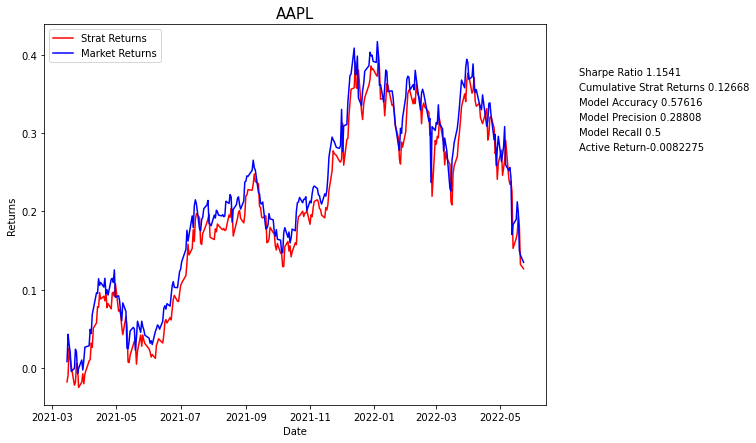

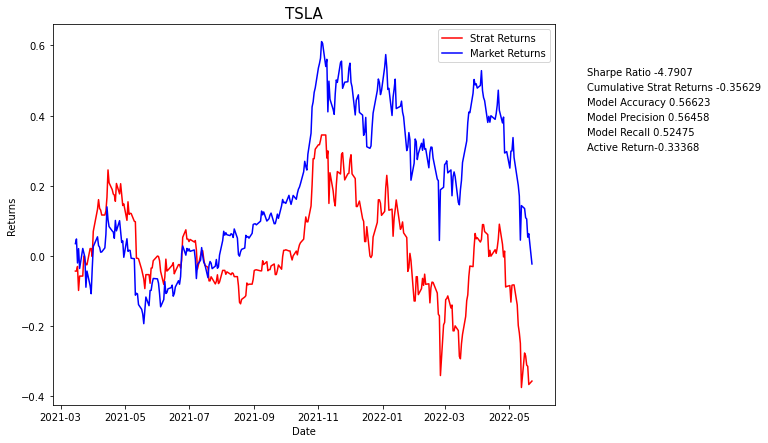

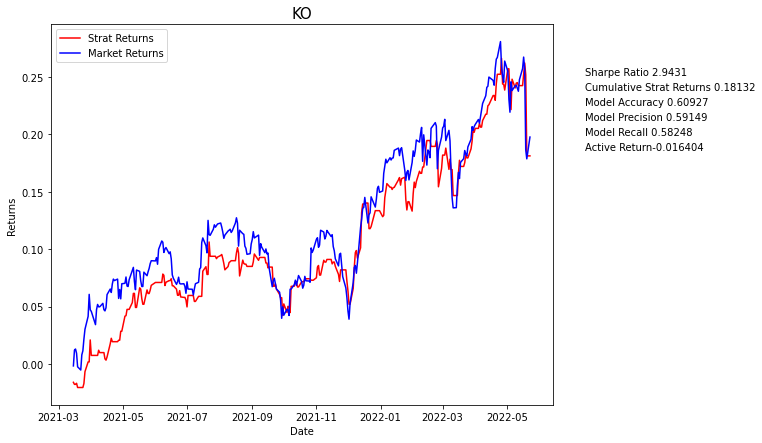

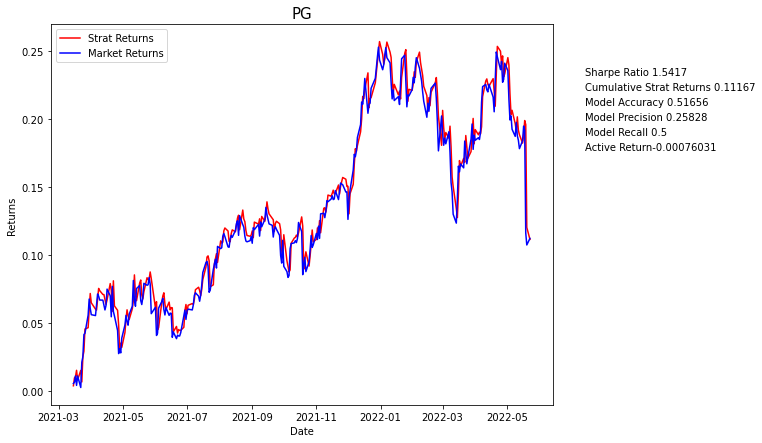

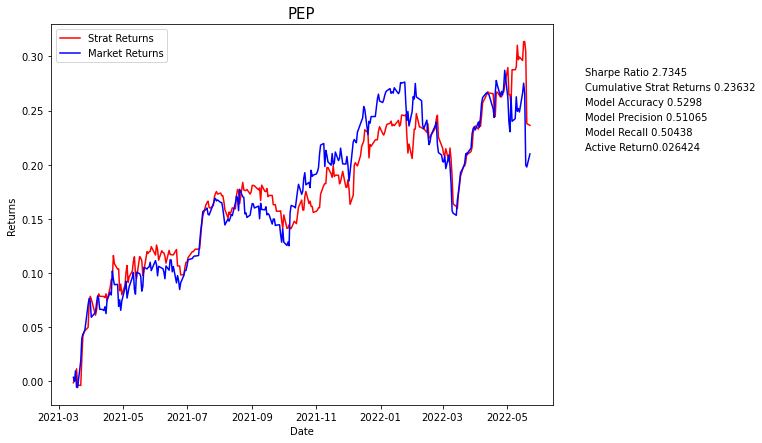

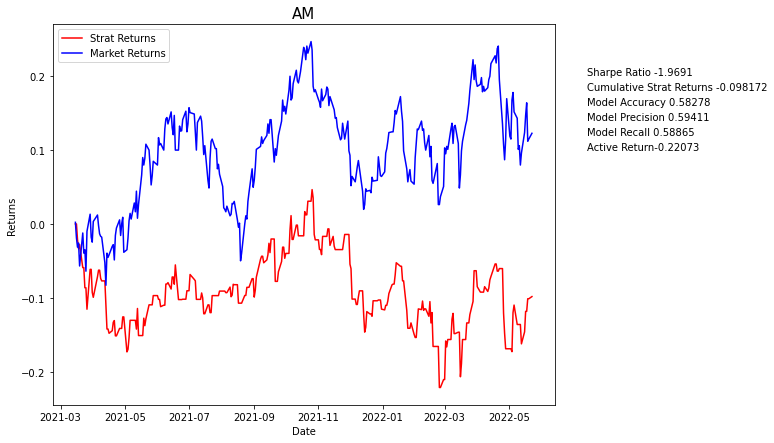

In [253]:
#import matplot for new charts
import matplotlib.pyplot as plt

#iterate through ticker list to create each graph
for i in ticker_list:
    fig, ax = plt.subplots(figsize=(9, 7))

# graph strategy and stock returns    
    ax.plot(Stock_Data[i][-prediction_length:].index.values,
            Stock_Data[i]['Total Strat Returns'][-prediction_length:].values, color='r', label="Strat Returns")
    
    ax.plot(Stock_Data[i][-prediction_length:].index.values,
            Stock_Data[i]['Market Returns'][-prediction_length:].values, color='b', label="Market Returns")
    
    ax.set(xlabel= "Date",ylabel="Returns")
    plt.title(i,fontsize=15)

# add metrics to each graph    
    plt.figtext(.95,0.78, s="Sharpe Ratio "+'{0:.5g}'.format(Model_Dict[i]['Sharpe_Ratio']))
    plt.figtext(.95,0.75, s="Cumulative Strat Returns "+'{0:.5g}'.format(Stock_Data[i]['Total Strat Returns'][-1]))
    plt.figtext(.95,0.72,s="Model Accuracy " +'{0:.5g}'.format(Model_Dict[i]['Accuracy']))
    plt.figtext(.95,0.69,s="Model Precision " +'{0:.5g}'.format(Model_Dict[i]['Precision']))
    plt.figtext(.95,0.66,s="Model Recall " +'{0:.5g}'.format(Model_Dict[i]['Recall']))
    plt.figtext(.95,0.63,s="Active Return" +'{0:.5g}'.format(Model_Dict[i]['Alpha']))
    
    plt.legend(loc='best')
    plt.show()